# 6242 PROJECT

Comment: Pat push, 3-FEB-20

## PHASE 1: PROJECT SETUP

Import the necessary libraries needed for ETL, engineering, and export efforts

In [39]:
import pandas as pd
import csv
import random
import sqlite3
import numpy as np
import datetime
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import getpass as gp

from shapely.geometry import Point, Polygon

In [40]:
!pip install geojson

In [41]:
!pip install descartes

In [42]:
!pip install geopandas

In [43]:
!pip install shapely

Function declaration

In [44]:
def function_1():
    '''
    DESCRIPTION: Sample description for the function
    '''

In [45]:
def function_2():
    '''
    DESCRIPTION: Sample description for the function
    '''

In [46]:
# set the random seed for the project in order to ensure consistent results
random.seed(6)

## PHASE 2: DATA ETL

## listings_2.csv Import

In [47]:
# import listings-2.csv into pandas dataframe
listings2_raw = pd.read_csv("listings-2.csv") 
listings2_raw.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3362,"Convention Center Rowhouse & In Law: 2 Units, 4BR",2798,Ayeh,NaN,"Shaw, Logan Circle",38.90982,-77.02016,Entire home/apt,433,2,177,2020-02-02,1.31,5,138
1,3663,Classic Rowhouse: Porch+ART+Parking,4617,Shawn & Richard,NaN,"Brightwood Park, Crestwood, Petworth",38.95888,-77.02554,Entire home/apt,154,3,41,2018-05-21,0.36,1,26
2,3670,Beautiful Sun-Lit U Street 1BR/1BA,4630,Sheila,NaN,"Howard University, Le Droit Park, Cardozo/Shaw",38.91842,-77.02750,Private room,75,2,79,2018-07-25,1.31,1,0
3,3686,Vita's Hideaway,4645,Vita,NaN,Historic Anacostia,38.86314,-76.98836,Private room,55,2,71,2019-08-05,0.63,2,181
4,3771,Mt. Pleasant,4795,Charlene,NaN,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.92760,-77.03926,Private room,88,1,1,2009-01-21,0.01,1,0


In [48]:
# assign length of dataframe to a variable
listings_count = len(listings2_raw)
listings_count

9329

In [49]:
# create a list of column names
listings_cols = list(listings2_raw.columns)
listings_cols

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [50]:
listings2_raw.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9.329000e+03,9.329000e+03,0.0,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,7374.000000,9329.000000,9329.000000
mean,2.198952e+07,6.751530e+07,NaN,38.912086,-77.017725,209.214707,6.282131,40.574445,1.895331,11.498874,122.146640
std,1.189175e+07,7.735995e+07,NaN,0.023750,0.029237,471.444580,23.149357,68.205192,2.016273,34.256696,127.853462
min,3.362000e+03,1.585000e+03,NaN,38.819540,-77.112090,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.357499e+07,1.045208e+07,NaN,38.899290,-77.036890,79.000000,1.000000,1.000000,0.310000,1.000000,0.000000
50%,2.060259e+07,3.797307e+07,NaN,38.911370,-77.020160,115.000000,2.000000,10.000000,1.130000,1.000000,82.000000
75%,3.269423e+07,1.034932e+08,NaN,38.925240,-76.997480,189.000000,3.000000,51.000000,2.950000,4.000000,227.000000
max,4.246744e+07,3.378089e+08,NaN,38.995490,-76.910110,10000.000000,1000.000000,817.000000,13.730000,186.000000,365.000000


## neighbourhoods.csv Import

In [51]:
# import listings-2.csv into pandas dataframe
neighbor_raw = pd.read_csv("neighbourhoods.csv") 
neighbor_raw.head(5)

,neighbourhood_group,neighbourhood
0,NaN,"Brightwood Park, Crestwood, Petworth"
1,NaN,"Brookland, Brentwood, Langdon"
2,NaN,"Capitol Hill, Lincoln Park"
3,NaN,"Capitol View, Marshall Heights, Benning Heights"
4,NaN,"Cathedral Heights, McLean Gardens, Glover Park"


In [52]:
neighbor_raw['neighbourhood_group'].unique()

array([nan])

In [53]:
neighbor_raw.describe()

,neighbourhood_group
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [54]:
# import listings-2.csv into pandas dataframe
reviews_raw = pd.read_csv("reviews.csv") 
reviews_raw.head(5)

,listing_id,date
0,3362,2009-01-21
1,3362,2009-03-26
2,3362,2009-07-28
3,3362,2009-08-27
4,3362,2009-08-28


# Plot Geographic Points

In [57]:
dc_map = gpd.read_file('Washington_DC_Boundary/Washington_DC_Boundary.shp')

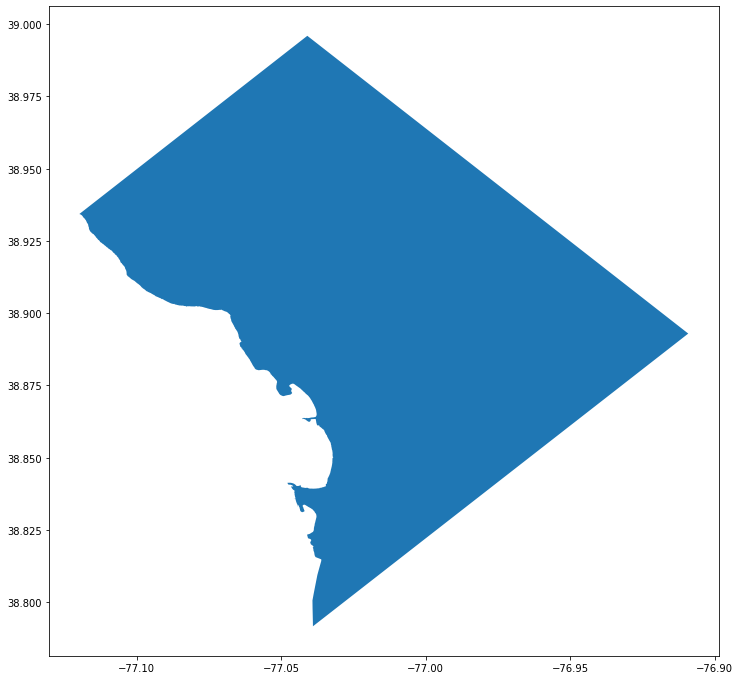

In [58]:
fig, ax = plt.subplots(figsize = (12,12))
dc_map.plot(ax = ax)